In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt 

In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
X_test.shape

(10000, 28, 28)

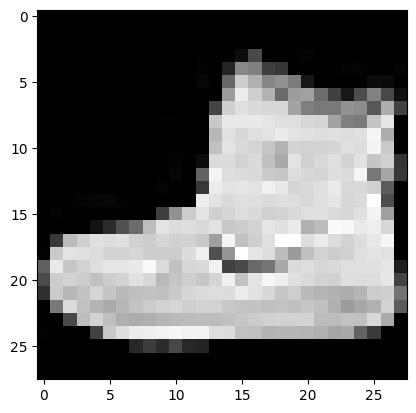

In [48]:
plt.gray()
plt.imshow(X_train[0])

In [49]:
class_names[y_test[0]]

'Ankle boot'

In [50]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 3000)              2355000   
                                                                 
 dense_7 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5366010 (20.47 MB)
Trainable params: 5366010 (20.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs = 5, batch_size = 300)

Epoch 1/5
200/200 [==============================] - 18s 89ms/step - loss: 0.2394 - accuracy: 0.9101
Epoch 2/5
200/200 [==============================] - 16s 82ms/step - loss: 0.2234 - accuracy: 0.9158
Epoch 3/5
200/200 [==============================] - 17s 83ms/step - loss: 0.2167 - accuracy: 0.9174
Epoch 4/5
200/200 [==============================] - 17s 83ms/step - loss: 0.2074 - accuracy: 0.9205
Epoch 5/5
200/200 [==============================] - 17s 83ms/step - loss: 0.1966 - accuracy: 0.9256


In [62]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 2s 8ms/step


array([[6.4474472e-04, 2.5980693e-04, 7.9275589e-05, ..., 9.9044216e-01,
        1.9860834e-04, 9.9998450e-01],
       [9.1967809e-01, 5.0366680e-08, 9.9999875e-01, ..., 9.5541024e-09,
        9.6820724e-05, 6.7565125e-08],
       [5.8875312e-03, 1.0000000e+00, 1.5734868e-06, ..., 5.8727377e-11,
        5.6135350e-06, 1.1758488e-07],
       ...,
       [7.6591666e-03, 1.1094108e-06, 1.6348485e-03, ..., 1.3816556e-03,
        9.9999446e-01, 1.8453534e-06],
       [7.3539733e-04, 1.0000000e+00, 6.1574043e-05, ..., 3.8521034e-07,
        1.1829450e-03, 9.7770586e-05],
       [1.2929130e-02, 5.5592584e-05, 1.5324980e-02, ..., 6.8766320e-01,
        4.2875549e-01, 4.8486115e-03]], dtype=float32)

In [63]:
y_pred = y_prob.argmax(axis = 1)

In [64]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [65]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[776,   0,  24,  42,   7,   0, 142,   0,   9,   0],
       [  2, 971,   4,  16,   5,   0,   1,   0,   1,   0],
       [  9,   1, 819,  11, 111,   0,  48,   0,   1,   0],
       [  8,   2,  16, 912,  40,   0,  17,   0,   5,   0],
       [  0,   0,  74,  23, 871,   0,  31,   0,   1,   0],
       [  0,   0,   0,   1,   0, 960,   0,  24,   1,  14],
       [ 84,   1,  92,  37,  98,   0, 680,   0,   8,   0],
       [  0,   0,   0,   0,   0,   6,   0, 980,   0,  14],
       [  3,   0,   3,   7,   3,   1,   1,   3, 979,   0],
       [  0,   0,   0,   1,   0,   4,   1,  36,   0, 958]])>

Text(95.72222222222221, 0.5, 'Truth')

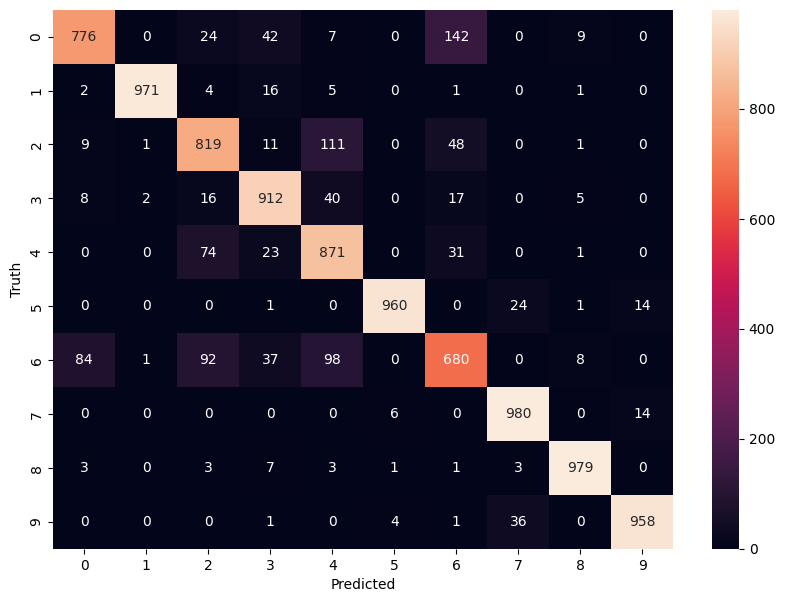

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')